<a href="https://colab.research.google.com/github/atipatdummanee/ML/blob/main/neural_network_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1523
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0492  
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0358  
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0309 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0158 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0209 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0176 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0125 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090 
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0120 
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

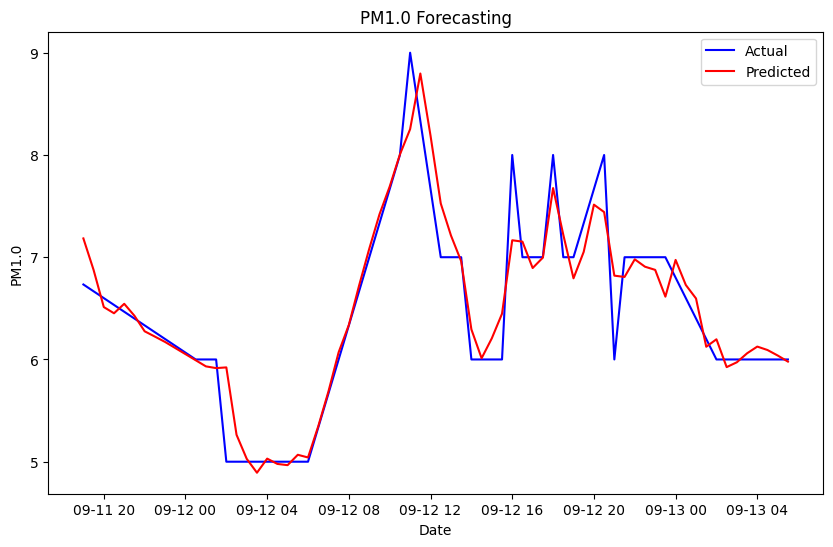

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0043  
Loss (MSE): 0.004765169695019722


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv("dataoutput.csv")


data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Normalize PM1.0 data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['PM1.0'].values.reshape(-1, 1))

# Create dataset with a 10-step window
def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Build and compile the neural network model
model = Sequential([
    Dense(64, activation='relu', input_dim=X.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on  data
model.fit(X, y, epochs=50, batch_size=10, verbose=1)

# Make predictions on the entire dataset
y_pred = model.predict(X)

# Rescale predictions and actual data to the original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_actual_rescaled = scaler.inverse_transform(y.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(data.index[time_step:], y_actual_rescaled, color='blue', label='Actual')
plt.plot(data.index[time_step:], y_pred_rescaled, color='red', label='Predicted')
plt.title('PM1.0 Forecasting')
plt.xlabel('Date')
plt.ylabel('PM1.0')
plt.legend()
plt.show()






# Evaluate the model
loss = model.evaluate(X, y)
print(f'Loss (MSE): {loss}')


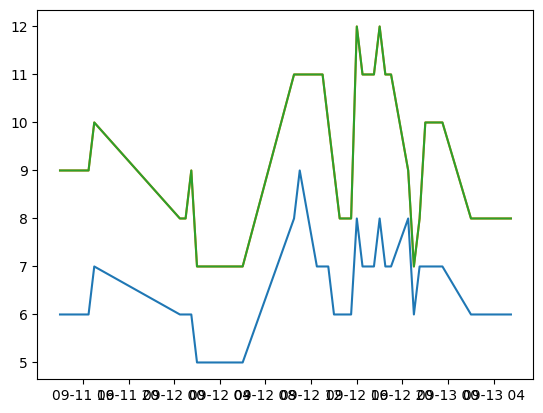

In [ ]:
plt.plot(data)